In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rc("font", family="monospace", weight="bold", size=9)

Ploting Train Data:

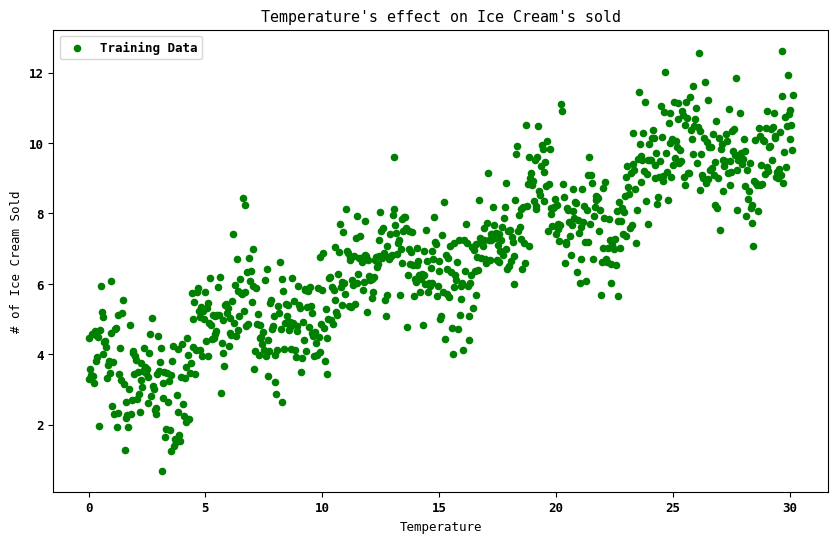

In [5]:

columns = ["Temperature", "Icecream"]
df = pd.read_fwf('train.txt', header=None, names=columns)

fig, ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax, x='Temperature', y='Icecream', color='green', s=20,  marker='o', label='Training Data', kind='scatter');

ax.set_ylabel('# of Ice Cream Sold')
ax.set_title('Temperature\'s effect on Ice Cream\'s sold');

Getting Beta Values:

In [10]:
X_train = df["Temperature"].to_numpy()
y_train = df["Icecream"].to_numpy()

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

beta0_hat = model.intercept_
beta1_hat = model.coef_[0]

print(f'β̂0 (Slope): {beta0_hat} ) \nβ̂1 (Intercept): {beta1_hat} )')

β̂0 (Slope): 3.191037800253056 ) 
β̂1 (Intercept): 0.238397630459365 )


In [14]:
X = df["Temperature"].to_numpy()
y = df["Icecream"].to_numpy()

Getting Statistical results for OLS Regression:

In [15]:
constant_x = sm.add_constant(X)

model = sm.OLS(y,constant_x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2840.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.30e-265
Time:                        16:23:49   Log-Likelihood:                -1212.4
No. Observations:                 800   AIC:                             2429.
Df Residuals:                     798   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1910      0.078     40.962      0.0

Can you conclude that there is a linear trend in the data? This is equivalent to ask whether you
can conclude that β1 is equal to zero or not. Justify your answer using statistical inference.

    From this StatsModel we can conclude that their is a linear Trend in the data.
    The reason for this is because of hour Hypothesis:
        • H₀: β̂1 = 0 (No linear trend)
        • H₁: β̂1 != 0 (there is a linear trend)
    we have a p value of 0.00,
    since the p value is less then the signifance level of (0.05) so we can reject the null hypothesis
    because we rejected the null hyposthesis we can conclude that β̂1 != 0
    which means their is a linear trend in the data

What about β0, can you conclude whether this parameter is zero or not?

    Hypothesis:
        •H₀: β̂0 = 0
        •H₁: β̂0 != 0
    We can conlude that it isn't zero because hte p value is less then the signifance level,
    rejecting teh null hypothesis β̂0 != 0